In [163]:
import numpy as np
import math
import matplotlib.pyplot as plt

def calculo_accuracy(X, Y, w):
    #Calculando a acurácia
    correct_predictions = 0
    for i in range(len(X)):
        prediction = sigmoid(np.dot(w, X[i]))
        #print("Preveu ",prediction)
        if sinal(prediction) == Y[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(X)
    return accuracy

def calcular_erro(Y, p_chapeu):
    N = len(p_chapeu)
    erro = 0
    for n in range(N):
        erro += -(Y[n] * np.log(p_chapeu[n]) + (1 - Y[n]) * np.log(1 - p_chapeu[n]))
    return erro / N


def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sinal(z):
    return 1 if z > 0.5 else 0

def calculo_S(p_chapeu, Y, X):
    N = len(p_chapeu)
    S = 0
    for n in range(N):
        S += (p_chapeu[n] - Y[n]) * X[n]
    return S / N

def calcula_p_chapeu(w, X):
    p_chapeu =[]
    for n in range(len(X)):
        p_chapeu.append(sigmoid(np.dot(w,X[n])))
    return p_chapeu      
        
def batche(X, Y, percent_to_keep):
    num_to_keep = math.ceil(len(X) * percent_to_keep)
    if num_to_keep >= len(X):
        return X.copy(), Y.copy()
    indices_to_keep = np.random.choice(len(X), num_to_keep, replace=False)
    X_batch = X[indices_to_keep]
    Y_batch = Y[indices_to_keep]
    return X_batch, Y_batch       

# Algoritmo conforme o pseudocódigo
def CLOGMGB(X, Y, w, eta,batch_size,epochs):
    t=0
    E=[]
    batch_size = batch_size/len(X)
    for epoca in range(epochs):
        X_batch, Y_batch = batche(X,Y,batch_size)
        p_chapeu = calcula_p_chapeu(w, X_batch)
        S = calculo_S(p_chapeu, Y_batch, X_batch)
        w = w - eta * S
        print(calculo_accuracy(X, Y, w) )
        E.append(calcular_erro(Y_batch, p_chapeu))
        print("Usando : ", len(X_batch)," Elementos")
    return E, np.array(w)
        
         
            
# Dados de entrada
X = np.array([[1, 1, 1], [1, 0, 0], [1, 1, 0], [1, 0, 1]])
Y = np.array([1, 0, 0, 0])


eta = 0.6
batch_size = 4
epochs = 200
w0 = np.array([0.0, 0.0, 0.0])
E, w = CLOGMGB(X, Y, w0, eta, batch_size,epochs)


print(calculo_accuracy(X, Y, w))
print("w Optimo ->", w)



0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
0.75
Usando :  4  Elementos
1.0
Usando :  4  Elementos
1.0
Usando :  4  Elementos
1.0
Usando :  4  Elementos
1.0
Usando :  4  Elementos
1.0
Usando :  4  Elementos
1.0
Usando :  4  Elementos
1.0
Usando :  4  Elementos
1.0
Usando :  4  Elementos
1.0
Usando :  4  Elementos
1.0
Usando :  4  Elementos
1.

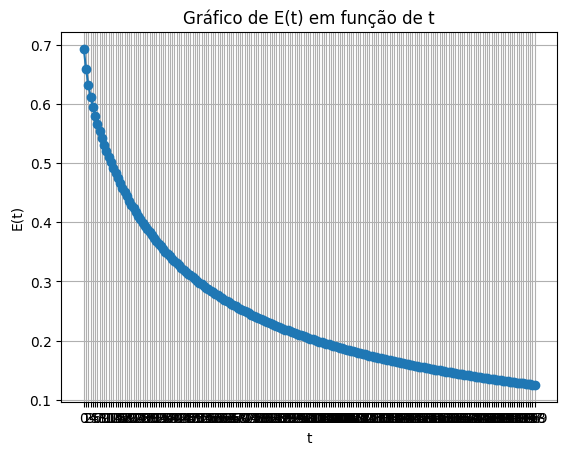

In [159]:

t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, marker='o', linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

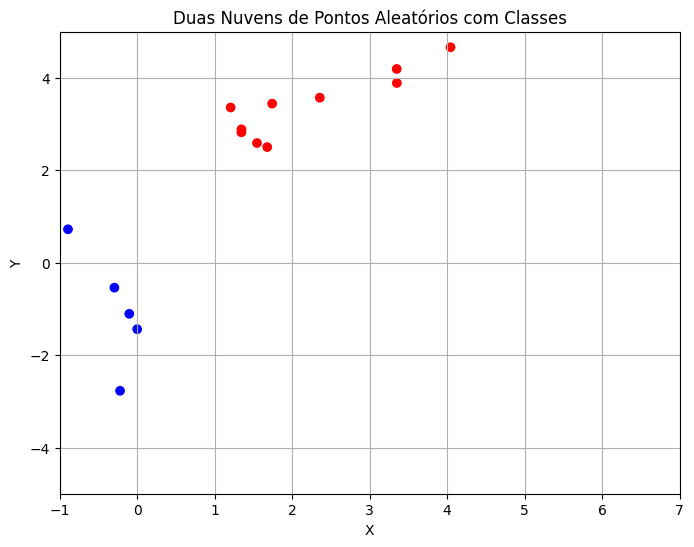

Shape do dataset (X): (20, 2)
Shape do dataset (Y): (20,)
[[ 3.35125008e+00  3.89035923e+00]
 [-8.92452850e-01  7.23864139e-01]
 [-1.22996972e+00 -8.76107851e-01]
 [ 6.92901958e-04 -1.43891537e+00]
 [ 1.34491130e+00  2.82312707e+00]
 [-1.39984557e+00 -1.18630185e+00]
 [ 3.34932646e+00  4.19384683e+00]
 [ 1.20626527e+00  3.36046495e+00]
 [ 1.74219863e+00  3.44331955e+00]
 [ 1.34608580e+00  2.88757110e+00]
 [-1.01816704e-01 -1.10603273e+00]
 [ 2.35705600e+00  3.57218500e+00]
 [-2.93590601e-01 -5.40388384e-01]
 [-1.32942570e+00 -5.06990570e-01]
 [-2.20836101e-01 -2.77185209e+00]
 [ 1.67852144e+00  2.50339811e+00]
 [ 4.04361844e+00  4.66445745e+00]
 [-1.22226767e+00 -2.51037166e+00]
 [ 1.54612785e+00  2.59130024e+00]
 [-1.38352986e+00  4.63853804e-01]]
[0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1]


In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o número de pontos
num_samples = 10

# Função para gerar pontos aleatórios dentro de um círculo com centro (center_x, center_y) e raio radius
def generate_random_points(center_x, center_y, radius, num_samples):
    angles = np.random.uniform(0, 2 * np.pi, num_samples)
    radii = np.sqrt(np.random.uniform(0, radius**2, num_samples))
    x = center_x + radii * np.cos(angles)
    y = center_y + radii * np.sin(angles)
    return np.column_stack((x, y))

# Gerando pontos aleatórios para as duas nuvens de pontos
x1, y1 = generate_random_points(-1, -1, 2, num_samples).T
x2, y2 = generate_random_points(3, 3, 2, num_samples).T

# Criando as listas X e Y

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
Y = np.hstack((np.full(num_samples, 1), np.full(num_samples, 0)))

# Embaralhando X e aplicando a mesma permutação em Y
shuffle_indices = np.random.permutation(len(X))
X_data = X[shuffle_indices]
Y_data = Y[shuffle_indices]

# Mapeando as classes para cores
colors = {0: 'r', 1: 'b'}
class_colors = [colors[y] for y in Y_data]

# Visualizando os pontos
plt.figure(figsize=(8, 6))
plt.scatter(X_data[:, 0], X_data[:, 1], c=class_colors)
plt.title("Duas Nuvens de Pontos Aleatórios com Classes")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.xlim(-1, 7)
plt.ylim(-5, 5)
plt.show()

print("Shape do dataset (X):", X_data.shape)
print("Shape do dataset (Y):", Y_data.shape)
print(X_data)
print(Y_data)


In [165]:
eta = 1
batch_size =10
epochs =200
w0 = np.array([0.0, 0.0, 0.0])
X = np.insert(X_data, 0, 1, axis=1)

E, w = CLOGMGB(X, Y, w0, eta, batch_size, epochs)

print(calculo_accuracy(X, Y, w))
print(len(X))

0.65
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.4
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.65
Usando :  10  Elementos
0.4
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.45
Usando :  10  Elementos
0.55
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.5
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.5
Usando :  10  Elementos
0.55
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.7
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.55
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.5
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.45
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.55
Usando :  10  Elementos
0.55
Usando :  10  Elementos
0.5
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.6
Usando :  10  Elementos
0.6
Usando 

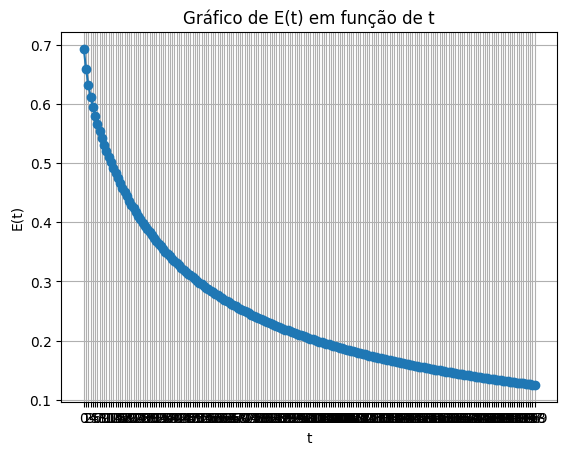

In [161]:

t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, marker='o', linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [166]:
import numpy as np
import pandas as pd
# Carregar os dados do arquivo CSV
#data = pd.read_csv('Ex4_D.csv', header=None)
data = pd.read_csv('Ex6_D.csv', header=None)
#data = pd.read_csv('Ex6_D.csv', header=None)


# Separar os dados em x e y
X = np.array(data.iloc[:, :-1].values)
Y = np.array(data.iloc[:, -1].values)
Y[Y == -1] = 0

epochs =200
eta = 1
batch_size = len(X)
w0 = np.array([0.0, 0.0, 0.0])
X_till = np.insert(X, 0, 1, axis=1)

E, w  = CLOGMGB(X_till, Y, w0, eta, batch_size,epochs)
print(X_till[0])
print(w)
print(calculo_accuracy(X_till, Y, w))

0.8125
Usando :  48  Elementos
0.8125
Usando :  48  Elementos
0.8333333333333334
Usando :  48  Elementos
0.8541666666666666
Usando :  48  Elementos
0.8541666666666666
Usando :  48  Elementos
0.8541666666666666
Usando :  48  Elementos
0.875
Usando :  48  Elementos
0.875
Usando :  48  Elementos
0.875
Usando :  48  Elementos
0.875
Usando :  48  Elementos
0.8958333333333334
Usando :  48  Elementos
0.8958333333333334
Usando :  48  Elementos
0.8958333333333334
Usando :  48  Elementos
0.8958333333333334
Usando :  48  Elementos
0.8958333333333334
Usando :  48  Elementos
0.8958333333333334
Usando :  48  Elementos
0.8958333333333334
Usando :  48  Elementos
0.8958333333333334
Usando :  48  Elementos
0.8958333333333334
Usando :  48  Elementos
0.9166666666666666
Usando :  48  Elementos
0.9166666666666666
Usando :  48  Elementos
0.9166666666666666
Usando :  48  Elementos
0.9166666666666666
Usando :  48  Elementos
0.9166666666666666
Usando :  48  Elementos
0.9166666666666666
Usando :  48  Elementos
0

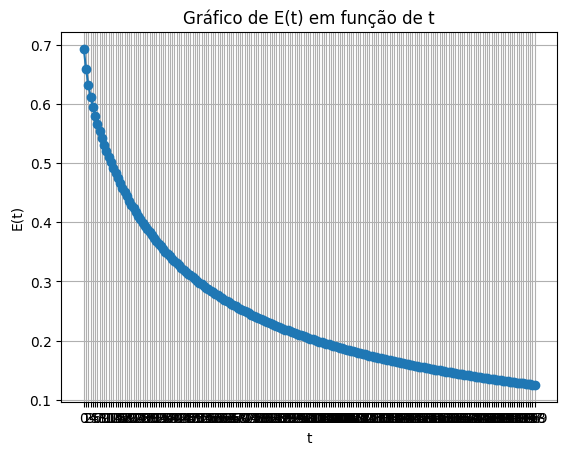

In [162]:

t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, marker='o', linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()